# Neural Networks and Deep Learning Spring 1400 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Homework 2 - Question 1


### By Omid Vaheb

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import seaborn as sns
import random as rnd
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import drive 
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


## Reading Dataset

In [2]:
dataframe = pd.read_csv('/content/drive/My Drive/house prices.csv')

## Observing Data

In [3]:
dataframe.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [4]:
dataframe.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Preproccessing

## Droping Columns with a lot of Null

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print(dataframe.dtypes.astype(str).value_counts())

object     43
int64      35
float64     3
dtype: int64


In [7]:
size = dataframe.shape[0]
dataframe = dataframe.dropna(axis = 1, thresh = int(0.6 * size + 1))

In [8]:
dataframe.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Handling Other Columns with Fewer Nulls

In [10]:
nulls = dataframe.isnull().sum()
nulls[nulls > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [11]:
dataframe["MasVnrType"] = dataframe["MasVnrType"].fillna('None')
dataframe["BsmtQual"] = dataframe["BsmtQual"].fillna('None')
dataframe["BsmtCond"] = dataframe["BsmtCond"].fillna('None')
dataframe["BsmtExposure"] = dataframe["BsmtExposure"].fillna('None')
dataframe["BsmtFinType1"] = dataframe["BsmtFinType1"].fillna('None')
dataframe["BsmtFinType2"] = dataframe["BsmtFinType2"].fillna('None')
dataframe["Electrical"] = dataframe["Electrical"].fillna('None')
dataframe["GarageType"] = dataframe["GarageType"].fillna('None')
dataframe["GarageFinish"] = dataframe["GarageFinish"].fillna('None')
dataframe["GarageQual"] = dataframe["GarageQual"].fillna('None')
dataframe["GarageCond"] = dataframe["GarageCond"].fillna('None')

## Transforming Columns to Numerical

In [12]:
label_encoder = LabelEncoder()
dataframe["MasVnrType"] = label_encoder.fit_transform(dataframe["MasVnrType"])
dataframe["BsmtQual"] = label_encoder.fit_transform(dataframe["BsmtQual"])
dataframe["BsmtCond"] = label_encoder.fit_transform(dataframe["BsmtCond"])
dataframe["BsmtExposure"] = label_encoder.fit_transform(dataframe["BsmtExposure"])
dataframe["BsmtFinType1"] = label_encoder.fit_transform(dataframe["BsmtFinType1"])
dataframe["BsmtFinType2"] = label_encoder.fit_transform(dataframe["BsmtFinType2"])
dataframe["Electrical"] = label_encoder.fit_transform(dataframe["Electrical"])
dataframe["GarageType"] = label_encoder.fit_transform(dataframe["GarageType"])
dataframe["GarageFinish"] = label_encoder.fit_transform(dataframe["GarageFinish"])
dataframe["GarageQual"] = label_encoder.fit_transform(dataframe["GarageQual"])
dataframe["GarageCond"] = label_encoder.fit_transform(dataframe["GarageCond"])
dataframe["LotFrontage"] = label_encoder.fit_transform(dataframe["LotFrontage"])
dataframe["MasVnrArea"] = label_encoder.fit_transform(dataframe["MasVnrArea"])
dataframe["GarageYrBlt"] = label_encoder.fit_transform(dataframe["GarageYrBlt"])

In [13]:
dataframe.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,36,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,1,128,Gd,TA,PConc,2,4,3,2,706,6,0,150,856,GasA,Ex,Y,5,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,1,89,2,2,548,5,5,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,51,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,2,0,TA,TA,CBlock,2,4,1,0,978,6,0,284,1262,GasA,Ex,Y,5,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,1,62,2,2,460,5,5,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,39,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,1,104,Gd,TA,PConc,2,4,2,2,486,6,0,434,920,GasA,Ex,Y,5,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,1,87,2,2,608,5,5,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,31,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,2,0,TA,TA,BrkTil,4,1,3,0,216,6,0,540,756,GasA,Gd,Y,5,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,5,84,3,3,642,5,5,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,55,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,1,221,Gd,TA,PConc,2,4,0,2,655,6,0,490,1145,GasA,Ex,Y,5,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,1,86,2,3,836,5,5,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,56,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,2,0,TA,TA,Wood,2,4,3,2,732,6,0,64,796,GasA,Ex,Y,5,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,1,79,3,2,480,5,5,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,46,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,3,123,Gd,TA,PConc,0,4,0,2,1369,6,0,317,1686,GasA,Ex,Y,5,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,1,90,2,2,636,5,5,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,141,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,3,157,TA,TA,CBlock,2,4,2,0,859,1,32,216,1107,GasA,Ex,Y,5,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,1,59,2,2,484,5,5,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,22,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,2,0,TA,TA,BrkTil,4,4,3,6,0,6,0,952,952,GasA,Gd,Y,1,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,5,19,3,2,468,1,5,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,21,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,2,0,TA,TA,BrkTil,4,4,3,2,851,6,0,140,991,GasA,Ex,Y,5,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,1,27,2,1,205,2,5,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [15]:
nulls = dataframe.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

## One Hot Encoding Categoricals

In [16]:
dataframe2 = pd.get_dummies(dataframe, drop_first = True)
dataframe2  = dataframe2.fillna(dataframe2.mean())

In [17]:
dataframe2.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,36,8450,7,5,2003,2003,1,128,2,4,3,2,706,6,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,8,0,1,89,2,2,548,5,5,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,51,9600,6,8,1976,1976,2,0,2,4,1,0,978,6,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,6,1,1,62,2,2,460,5,5,298,...,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,39,11250,7,5,2001,2002,1,104,2,4,2,2,486,6,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,6,1,1,87,2,2,608,5,5,0,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,31,9550,7,5,1915,1970,2,0,4,1,3,0,216,6,0,540,756,5,961,756,0,1717,1,0,1,0,3,1,7,1,5,84,3,3,642,5,5,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,55,14260,8,5,2000,2000,1,221,2,4,0,2,655,6,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,9,1,1,86,2,3,836,5,5,192,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,6,50,56,14115,5,5,1993,1995,2,0,2,4,3,2,732,6,0,64,796,5,796,566,0,1362,1,0,1,1,1,1,5,0,1,79,3,2,480,5,5,40,...,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,7,20,46,10084,8,5,2004,2005,3,123,0,4,0,2,1369,6,0,317,1686,5,1694,0,0,1694,1,0,2,0,3,1,7,1,1,90,2,2,636,5,5,255,...,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,8,60,141,10382,7,6,1973,1973,3,157,2,4,2,0,859,1,32,216,1107,5,1107,983,0,2090,1,0,2,1,3,1,7,2,1,59,2,2,484,5,5,235,...,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,9,50,22,6120,7,5,1931,1950,2,0,4,4,3,6,0,6,0,952,952,1,1022,752,0,1774,0,0,2,0,2,2,8,2,5,19,3,2,468,1,5,90,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
9,10,190,21,7420,5,6,1939,1950,2,0,4,4,3,2,851,6,0,140,991,5,1077,0,0,1077,1,0,1,0,2,2,5,2,1,27,2,1,205,2,5,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


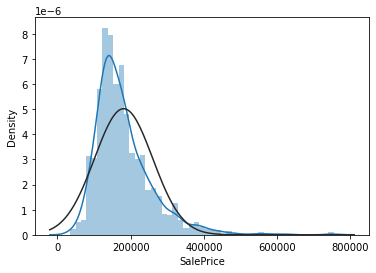

In [18]:
sns.distplot(dataframe['SalePrice'], fit = norm)

## Scaling Numerical Columns

In [19]:
numerics = dataframe2.dtypes[dataframe2.dtypes != 'object'].index
dataframe2[numerics] = dataframe2[numerics].apply(lambda x: (x - x.mean()) / (x.std()))
dataframe2[numerics] = dataframe2[numerics].fillna(0)
dataframe2 = pd.get_dummies(dataframe2, dummy_na = True)

In [20]:
dataframe2.shape

(1460, 204)

In [21]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 204 entries, Id to SaleCondition_Partial
dtypes: float64(204)
memory usage: 2.3 MB


In [22]:
dataframe2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,1.140640e-17,-1.548229e-16,-5.151891e-17,-7.585257e-17,2.644764e-16,4.050033e-16,1.061442e-15,4.505985e-15,6.083414e-19,-4.577769e-17,-2.185466e-16,7.794374e-17,3.257668e-16,7.436973e-17,-1.961901e-17,1.788524e-16,-1.657730e-16,-8.935014e-17,2.376334e-16,-5.934750e-16,6.298234e-17,-9.064287e-17,6.810192e-16,-1.607162e-16,-6.083414e-18,1.373711e-16,8.881784e-17,1.406789e-16,3.068892e-16,4.276640e-16,-2.967185e-16,2.920039e-17,1.003763e-16,1.060035e-16,8.440737e-17,-1.825024e-18,1.596896e-18,-8.668865e-17,3.920760e-16,1.539104e-16,...,2.085090e-16,1.490436e-17,6.813423e-17,3.575526e-16,-1.394052e-16,1.469144e-16,2.954258e-17,1.126192e-16,-5.478114e-16,-6.013264e-16,-1.008231e-16,-8.277245e-17,-2.056194e-16,9.345169e-17,-3.578568e-16,2.372531e-16,-1.304892e-16,-6.106227e-17,9.642211e-17,-3.237992e-16,3.778941e-16,9.539553e-17,-1.788714e-16,9.345169e-17,4.854564e-16,2.161513e-16,-2.473668e-16,-1.967414e-16,-1.306033e-17,-2.501994e-16,-9.516265e-16,-2.617674e-16,1.062316e-16,-4.224931e-16,-2.832590e-16,-6.298805e-16,7.931251e-17,-6.216489e-18,1.494239e-16,-6.653734e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+

In [23]:
dataframe2.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,...,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730272,0.073350,-0.473190,-0.207071,0.651256,-0.517023,1.050634,0.878367,-1.241024,0.746123,-0.566745,0.325294,0.591703,-0.510767,0.575228,0.343933,-0.288554,-0.944267,-0.459145,0.304151,-0.793162,1.161454,-0.120201,0.370207,1.107431,-0.240978,0.789470,1.227165,0.163723,-0.211381,0.911897,-0.950901,-0.768473,0.691800,0.103460,0.311618,0.350880,0.315494,0.295248,-0.751918,...,0.372492,-0.875802,1.120584,-0.129235,-0.064216,-0.045361,0.149645,-0.111688,-0.069385,-0.037024,-0.052396,-0.186288,-0.444486,-0.026171,-0.643774,0.263722,-0.16561,1.220838,-1.006528,-0.058601,-0.147237,-0.154359,-0.10185,-0.026171,0.271070,-0.144792,0.29915,-0.052396,-0.037024,-0.07873,-0.058601,-0.058601,-0.301858,-0.045361,0.390159,-0.052396,-0.091003,-0.117811,0.467491,-0.30589
1,-1.727900,-0.872264,-0.295012,-0.091855,-0.071812,2.178881,0.156680,-0.429430,0.386914,-0.651824,-0.566745,0.325294,-1.124059,-1.399057,1.171591,0.343933,-0.288554,-0.641008,0.466305,0.304151,0.257052,-0.794891,-0.120201,-0.482347,-0.819684,3.947457,0.789470,-0.761360,0.163723,-0.211381,-0.318574,0.600289,-0.768473,-0.230787,0.103460,0.311618,-0.060710,0.315494,0.295248,1.625638,...,0.372492,1.141029,-0.891781,-0.129235,-0.064216,-0.045361,0.149645,-0.111688,-0.069385,-0.037024,-0.052396,-0.186288,-0.444486,-0.026171,-0.643774,0.263722,-0.16561,-0.818548,0.992834,-0.058601,-0.147237,-0.154359,-0.10185,-0.026171,0.271070,-0.144792,0.29915,-0.052396,-0.037024,-0.07873,-0.058601,-0.058601,-0.301858,-0.045361,0.390159,-0.052396,-0.091003,-0.117811,0.467491,-0.30589
2,-1.725528,0.073350,-0.437555,0.073455,0.651256,-0.517023,0.984415,0.829930,-1.241024,0.484008,-0.566745,0.325294,-0.266178,-0.510767,0.092875,0.343933,-0.288554,-0.301540,-0.313261,0.304151,-0.627611,1.188943,-0.120201,0.514836,1.107431,-0.240978,0.789470,1.227165,0.163723,-0.211381,-0.318574,0.600289,-0.768473,0.623460,0.103460,0.311618,0.631510,0.315494,0.295248,-0.751918,...,0.372492,-0.875802,1.120584,-0.129235,-0.064216,-0.045361,0.149645,-0.111688,-0.069385,-0.037024,-0.052396,-0.186288,-0.444486,-0.026171,-0.643774,0.263722,-0.16561,1.220838,-1.006528,-0.058601,-0.147237,-0.154359,-0.10185,-0.026171,0.271070,-0.144792,0.29915,-0.052396,-0.037024,-0.07873,-0.058601,-0.058601,-0.301858,-0.045361,0.390159,-0.052396,-0.091003,-0.117811,0.467491,-0.30589
3,-1.723156,0.309753,-0.532583,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,0.386914,-0.651824,0.997429,-2.833877,0.591703,-1.399057,-0.499103,0.343933,-0.288554,-0.061648,-0.687089,0.304151,-0.521555,0.936955,-0.120201,0.383528,1.107431,-0.240978,-1.025689,-0.761360,0.163723,-0.211381,0.296662,0.600289,1.300629,0.520951,0.942636,1.649742,0.790533,0.315494,0.295248,-0.751918,...,0.372492,-0.875802,-0.891781,-0.129235,-0.064216,-0.045361,0.149645,-0.111688,-0.069385,-0.037024,-0.052396,-0.186288,2.248250,-0.026171,-0.643774,0.263722,-0.16561,1.220838,-1.006528,-0.058601,-0.147237,-0.154359,-0.10185,-0.026171,0.271070,-0.1447

## Train and Test Split

In [24]:
y = dataframe2['SalePrice']
X = dataframe2.drop(['Id', 'SalePrice'], inplace = False, axis = 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Learning

## One Layer with ReLU as Activation Function

In [38]:
model = Sequential([Dense(50, activation = 'relu', input_shape = (202,)),
                    Dense(1, kernel_initializer = 'normal')])
model.summary()

model.compile(loss = 'mean_squared_error', optimizer = 'adam',  metrics = ['mse'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 50)                10150     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 10,201
Trainable params: 10,201
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = (model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)).history

Epoch 1/10
30/30 [==============================] - 1s 10ms/step - loss: 0.6680 - mse: 0.6680 - val_loss: 0.3729 - val_mse: 0.3729
Epoch 2/10
30/30 [==============================] - 0s 3ms/step - loss: 0.2652 - mse: 0.2652 - val_loss: 0.2299 - val_mse: 0.2299
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1582 - mse: 0.1582 - val_loss: 0.1931 - val_mse: 0.1931
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1187 - mse: 0.1187 - val_loss: 0.1830 - val_mse: 0.1830
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1060 - mse: 0.1060 - val_loss: 0.1830 - val_mse: 0.1830
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1195 - mse: 0.1195 - val_loss: 0.1799 - val_mse: 0.1799
Epoch 7/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0812 - mse: 0.0812 - val_loss: 0.1776 - val_mse: 0.1776
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0663 - mse: 0.0

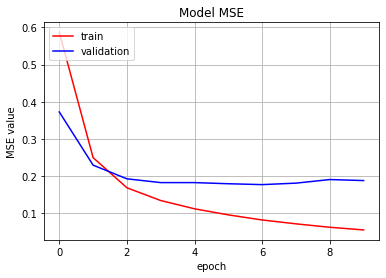

In [40]:
fig = plt.figure()
plt.plot(history['loss'], 'r')
plt.plot(history['val_loss'], 'b')
plt.title('Model MSE')
plt.ylabel('MSE value')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.grid()

In [42]:
y_pred = model.predict(X_test)
test_loss = model.evaluate(X_test, y_test)
print("Test Loss", test_loss[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.1700 - mse: 0.1700
Test Loss 0.1700265109539032


## One Layer With Softmax as Activation Function

In [48]:
model = Sequential([Dense(50, activation = 'softmax', input_shape = (202,)),
                    Dense(1, kernel_initializer = 'normal')])
model.summary()

model.compile(loss = 'mean_squared_error', optimizer = 'adam',  metrics = ['mse'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50)                10150     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 10,201
Trainable params: 10,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = (model.fit(X_train, y_train, batch_size = 32, epochs = 80, validation_split = 0.2)).history

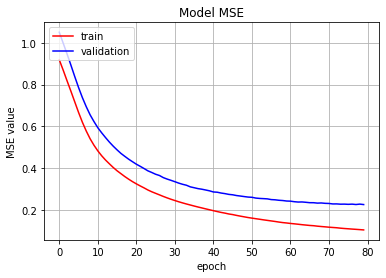

In [46]:
fig = plt.figure()
plt.plot(history['loss'], 'r')
plt.plot(history['val_loss'], 'b')
plt.title('Model MSE')
plt.ylabel('MSE value')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.grid()

In [47]:
y_pred = model.predict(X_test)
test_loss = model.evaluate(X_test, y_test)
print("Test Loss", test_loss[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.2720 - mse: 0.2720
Test Loss 0.272044837474823


## Two Layers with ReLU as Activation Function

In [103]:
model = Sequential([Dense(90, activation = 'relu', input_shape = (202,)),
                    Dense(15, activation = 'relu'),
                    Dense(1, kernel_initializer = 'normal')])
model.summary()

model.compile(loss = 'mean_squared_error', optimizer = 'adam',  metrics = ['mse'])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 90)                18270     
_________________________________________________________________
dense_61 (Dense)             (None, 15)                1365      
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 16        
Total params: 19,651
Trainable params: 19,651
Non-trainable params: 0
_________________________________________________________________


In [104]:
history = (model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)).history

Epoch 1/10
30/30 [==============================] - 1s 10ms/step - loss: 0.7525 - mse: 0.7525 - val_loss: 0.4787 - val_mse: 0.4787
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2767 - mse: 0.2767 - val_loss: 0.1914 - val_mse: 0.1914
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.1614 - mse: 0.1614 - val_loss: 0.1557 - val_mse: 0.1557
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1059 - mse: 0.1059 - val_loss: 0.1443 - val_mse: 0.1443
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0786 - mse: 0.0786 - val_loss: 0.1338 - val_mse: 0.1338
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0665 - mse: 0.0665 - val_loss: 0.1423 - val_mse: 0.1423
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.1374 - val_mse: 0.1374
Epoch 8/10
30/30 [==============================] - 0s 3ms/step - loss: 0.0599 - mse: 0.0

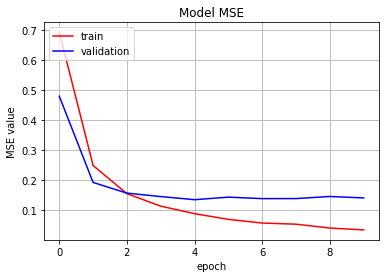

In [105]:
fig = plt.figure()
plt.plot(history['loss'], 'r')
plt.plot(history['val_loss'], 'b')
plt.title('Model MSE')
plt.ylabel('MSE value')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.grid()

In [106]:
y_pred = model.predict(X_test)
test_loss = model.evaluate(X_test, y_test)
print("Test Loss", test_loss[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.1681 - mse: 0.1681
Test Loss 0.1681033819913864


## Two Layers with Softmax as Activation Function

In [107]:
model = Sequential([Dense(90, activation = 'softmax', input_shape = (202,)),
                    Dense(15, activation = 'softmax'),
                    Dense(1, kernel_initializer = 'normal')])
model.summary()

model.compile(loss = 'mean_squared_error', optimizer = 'adam',  metrics = ['mse'])

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 90)                18270     
_________________________________________________________________
dense_64 (Dense)             (None, 15)                1365      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 16        
Total params: 19,651
Trainable params: 19,651
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = (model.fit(X_train, y_train, batch_size = 32, epochs = 80, validation_split = 0.2)).history

Epoch 1/80
30/30 [==============================] - 1s 10ms/step - loss: 1.0072 - mse: 1.0072 - val_loss: 1.1030 - val_mse: 1.1030
Epoch 2/80
30/30 [==============================] - 0s 3ms/step - loss: 0.9607 - mse: 0.9607 - val_loss: 1.1005 - val_mse: 1.1005
Epoch 3/80
30/30 [==============================] - 0s 3ms/step - loss: 0.8874 - mse: 0.8874 - val_loss: 1.0971 - val_mse: 1.0971
Epoch 4/80
30/30 [==============================] - 0s 3ms/step - loss: 0.8801 - mse: 0.8801 - val_loss: 1.0919 - val_mse: 1.0919
Epoch 5/80
30/30 [==============================] - 0s 3ms/step - loss: 0.9603 - mse: 0.9603 - val_loss: 1.0826 - val_mse: 1.0826
Epoch 6/80
30/30 [==============================] - 0s 4ms/step - loss: 0.8424 - mse: 0.8424 - val_loss: 1.0685 - val_mse: 1.0685
Epoch 7/80
30/30 [==============================] - 0s 3ms/step - loss: 0.9145 - mse: 0.9145 - val_loss: 1.0492 - val_mse: 1.0492
Epoch 8/80
30/30 [==============================] - 0s 3ms/step - loss: 0.7869 - mse: 0.7

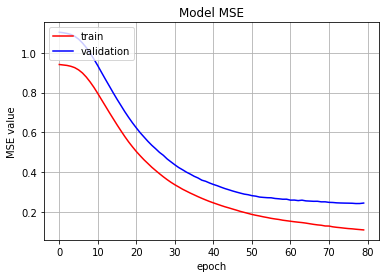

In [109]:
fig = plt.figure()
plt.plot(history['loss'], 'r')
plt.plot(history['val_loss'], 'b')
plt.title('Model MSE')
plt.ylabel('MSE value')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.grid()

In [110]:
y_pred = model.predict(X_test)
test_loss = model.evaluate(X_test, y_test)
print("Test Loss", test_loss[0])

10/10 [==============================] - 0s 2ms/step - loss: 0.2658 - mse: 0.2658
Test Loss 0.2658073902130127


## MSE as Loss

In [126]:
model = Sequential([Dense(90, activation = 'relu', input_shape = (202,)),
                    Dense(15, activation = 'relu'),
                    Dense(1, kernel_initializer = 'normal')])
model.summary()

model.compile(loss = 'mse', optimizer = 'adam',  metrics = ['mse', 'mae'])

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 90)                18270     
_________________________________________________________________
dense_79 (Dense)             (None, 15)                1365      
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 16        
Total params: 19,651
Trainable params: 19,651
Non-trainable params: 0
_________________________________________________________________


In [127]:
history = (model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)).history

Epoch 1/10
30/30 [==============================] - 1s 19ms/step - loss: 0.6994 - mse: 0.6994 - mae: 0.6211 - val_loss: 0.4055 - val_mse: 0.4055 - val_mae: 0.4265
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2603 - mse: 0.2603 - mae: 0.3362 - val_loss: 0.2108 - val_mse: 0.2108 - val_mae: 0.3083
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1826 - mse: 0.1826 - mae: 0.2522 - val_loss: 0.1663 - val_mse: 0.1663 - val_mae: 0.2636
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1297 - mse: 0.1297 - mae: 0.2057 - val_loss: 0.1476 - val_mse: 0.1476 - val_mae: 0.2524
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0769 - mse: 0.0769 - mae: 0.1790 - val_loss: 0.1390 - val_mse: 0.1390 - val_mae: 0.2440
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.0892 - mse: 0.0892 - mae: 0.1766 - val_loss: 0.1389 - val_mse: 0.1389 - val_mae: 0.2448
Epoch 7/10
30/30 [=========

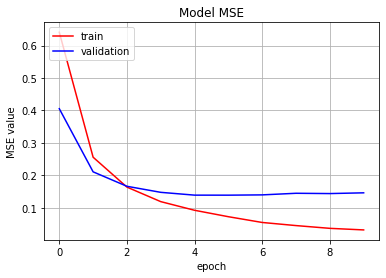

In [128]:
fig = plt.figure()
plt.plot(history['loss'], 'r')
plt.plot(history['val_loss'], 'b')
plt.title('Model MSE')
plt.ylabel('MSE value')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.grid()

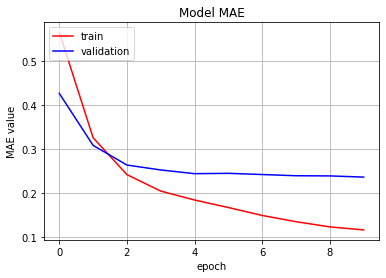

In [129]:
fig = plt.figure()
plt.plot(history['mae'], 'r')
plt.plot(history['val_mae'], 'b')
plt.title('Model MAE')
plt.ylabel('MAE value')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.grid()

Text(0, 0.5, 'Predicted')

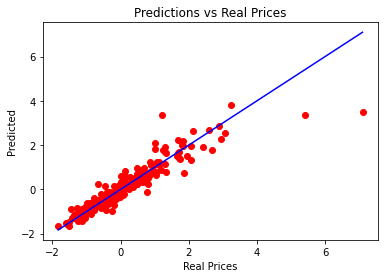

In [130]:
y_pred = model.predict(X_test)
y_test2 = y_test.to_list()
y_pred2 = y_pred.tolist()
all = []
for i in y_pred2:
    for j in i:
        all.append(j)
p1 = max(max(all), max(y_test2))
p2 = min(min(all), min(y_test2))
fig = plt.figure()
plt.scatter(y_test2, all, c = 'r')
plt.plot([p1, p2], [p1, p2], 'b')
plt.title('Predictions vs Real Prices')
plt.xlabel('Real Prices')
plt.ylabel('Predicted')

## MAE as Loss

In [131]:
model = Sequential([Dense(90, activation = 'relu', input_shape = (202,)),
                    Dense(15, activation = 'relu'),
                    Dense(1, kernel_initializer = 'normal')])
model.summary()

model.compile(loss = 'mae', optimizer = 'adam',  metrics = ['mse', 'mae'])

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 90)                18270     
_________________________________________________________________
dense_82 (Dense)             (None, 15)                1365      
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 16        
Total params: 19,651
Trainable params: 19,651
Non-trainable params: 0
_________________________________________________________________


In [132]:
history = (model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)).history

Epoch 1/10
30/30 [==============================] - 1s 11ms/step - loss: 0.6291 - mse: 0.9938 - mae: 0.6291 - val_loss: 0.3664 - val_mse: 0.3342 - val_mae: 0.3664
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.3152 - mse: 0.2725 - mae: 0.3152 - val_loss: 0.2771 - val_mse: 0.1892 - val_mae: 0.2771
Epoch 3/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2200 - mse: 0.1677 - mae: 0.2200 - val_loss: 0.2459 - val_mse: 0.1404 - val_mae: 0.2459
Epoch 4/10
30/30 [==============================] - 0s 4ms/step - loss: 0.2002 - mse: 0.2507 - mae: 0.2002 - val_loss: 0.2320 - val_mse: 0.1291 - val_mae: 0.2320
Epoch 5/10
30/30 [==============================] - 0s 4ms/step - loss: 0.1717 - mse: 0.1648 - mae: 0.1717 - val_loss: 0.2303 - val_mse: 0.1218 - val_mae: 0.2303
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1582 - mse: 0.1315 - mae: 0.1582 - val_loss: 0.2220 - val_mse: 0.1140 - val_mae: 0.2220
Epoch 7/10
30/30 [=========

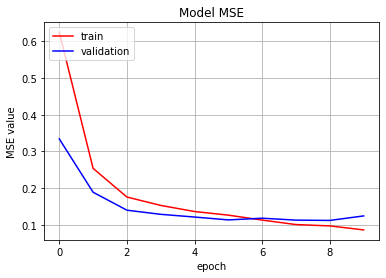

In [136]:
fig = plt.figure()
plt.plot(history['mse'], 'r')
plt.plot(history['val_mse'], 'b')
plt.title('Model MSE')
plt.ylabel('MSE value')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.grid()

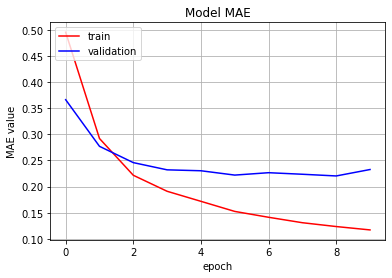

In [137]:
fig = plt.figure()
plt.plot(history['loss'], 'r')
plt.plot(history['val_loss'], 'b')
plt.title('Model MAE')
plt.ylabel('MAE value')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc="upper left")
plt.grid()

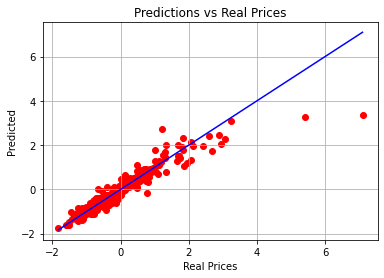

In [135]:
y_pred = model.predict(X_test)
y_test2 = y_test.to_list()
y_pred2 = y_pred.tolist()
all = []
for i in y_pred2:
    for j in i:
        all.append(j)
p1 = max(max(all), max(y_test2))
p2 = min(min(all), min(y_test2))
fig = plt.figure()
plt.scatter(y_test2, all, c = 'r')
plt.plot([p1, p2], [p1, p2], 'b')
plt.title('Predictions vs Real Prices')
plt.xlabel('Real Prices')
plt.ylabel('Predicted')
plt.grid()